In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
data = fetch_olivetti_faces()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f"Naive Bayes Accuracy: {accuracy}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Naive Bayes Accuracy: 74.17%
Confusion Matrix:
 [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 4]]


Number of misclassified images: 31


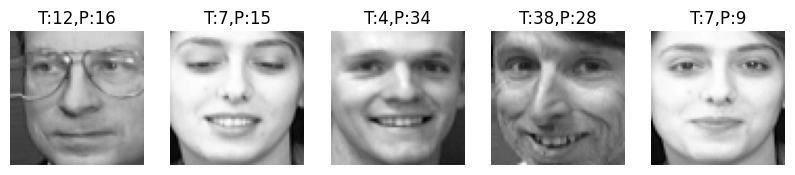

In [3]:
mis_idx = np.where(y_pred != y_test)[0]
print(f"Number of misclassified images: {len(mis_idx)}")
plt.figure(figsize=(10, 2))
for i, idx in enumerate(mis_idx[:5]):
  plt.subplot(1, 5, i+1)
  plt.imshow(x_test[idx].reshape(64, 64), cmap='gray')
  plt.title(f"T:{y_test[idx]},P:{y_pred[idx]}")
  plt.axis('off')
plt.show()

In [4]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = nb.predict_proba(x_test)
for i in range(y_test_bin.shape[1]):
  auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
  print(f"Class {i} AUC: {auc:.2f}")

Class 0 AUC: 0.80
Class 1 AUC: 0.88
Class 2 AUC: 1.00
Class 3 AUC: 1.00
Class 4 AUC: 1.00
Class 5 AUC: 1.00
Class 6 AUC: 0.67
Class 7 AUC: 0.50
Class 8 AUC: 1.00
Class 9 AUC: 0.97
Class 10 AUC: 0.83
Class 11 AUC: 1.00
Class 12 AUC: 0.98
Class 13 AUC: 0.83
Class 14 AUC: 1.00
Class 15 AUC: 0.99
Class 16 AUC: 0.48
Class 17 AUC: 0.49
Class 18 AUC: 0.50
Class 19 AUC: 0.49
Class 20 AUC: 0.49
Class 21 AUC: 0.50
Class 22 AUC: 0.48
Class 23 AUC: 0.48
Class 24 AUC: 0.49
Class 25 AUC: 0.48
Class 26 AUC: 0.49
Class 27 AUC: 0.49
Class 28 AUC: 0.45
Class 29 AUC: 0.49
Class 30 AUC: 0.49
Class 31 AUC: 0.50
Class 32 AUC: 0.49
Class 33 AUC: 0.49
Class 34 AUC: 0.49
Class 35 AUC: 0.48
Class 36 AUC: 0.49
Class 37 AUC: 0.49
Class 38 AUC: 0.50
